## Testing transforms.py

In [250]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.plots import *
from fastai.dataset import *

In [251]:
PATH = "data/fish/"
PATH = "/data2/yinterian/fisheries-kaggle/"

### Fish with bounding box

In [252]:
fnames,corner_labels,_,_ = parse_csv_labels(f'{PATH}trn_bb_corners_labels', skip_header=False)

In [299]:
def get_x(f):
    file_path = f'{PATH}/images/{f}'
    im = PIL.Image.open(file_path).convert('RGB')
    return im

In [300]:
f = 'img_02642.jpg'
x = get_x(f)
y = np.array(corner_labels[f], dtype=np.float32)
y

array([  699.39899,   954.69702,   895.32599,  1275.30005], dtype=float32)

In [255]:
x.size

(1280, 974)

In [256]:
rows = np.rint([y[0], y[0], y[2], y[2]]).astype(int)
rows

array([699, 699, 895, 895])

In [257]:
cols = np.rint([y[1], y[3], y[1], y[3]]).astype(int)
cols

array([ 955, 1275,  955, 1275])

In [258]:
corner_labels["img_02642.jpg"]

['699.399', '954.697', '895.326', '1275.3']

In [259]:
def create_corner_rect(bb, color='red'):
    bb = np.array(bb, dtype=np.float32)
    return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color, fill=False, lw=3)

def show_corner_bb(f='img_04908.jpg'):
    file_path = f'{PATH}images/{f}'
    bb = corner_labels[f]
    plots_from_files([file_path])
    plt.gca().add_patch(create_corner_rect(bb))

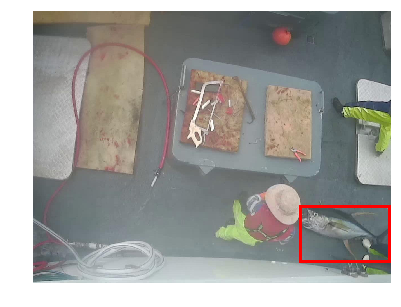

In [260]:
show_corner_bb(f = 'img_02642.jpg')

In [301]:
def get_x(self, i):
    return PIL.Image.open(file_path)

In [302]:
def create_rect(bb, color='red'):
    return plt.Rectangle((bb[1], bb[0]), bb[3]-bb[1], bb[2]-bb[0], color=color, fill=False, lw=3)

def plotXY(x,y):
    plots([x])
    plt.gca().add_patch(create_rect(y))

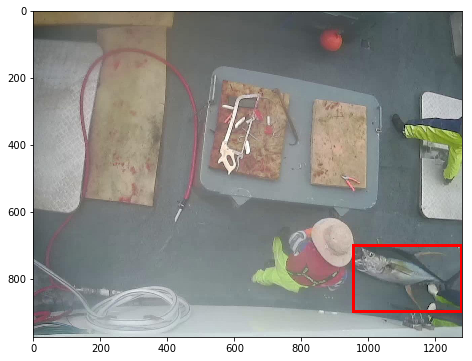

In [303]:
plotXY(x,y)

## Scale

In [266]:
xx, yy = ScaleXY(sz=350, tfm_y=TfmType.COORD)(x, y)

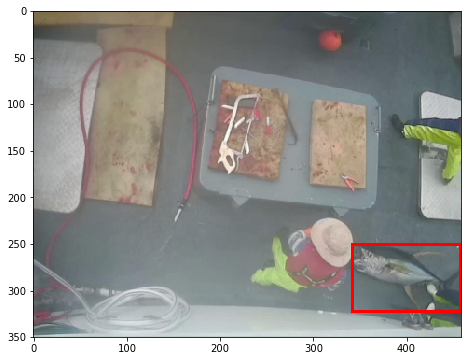

In [267]:
plotXY(xx,yy)

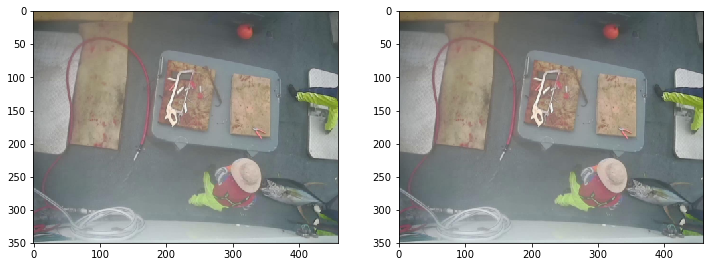

In [264]:
xx, yy = ScaleXY(sz=350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## RandomScale

In [268]:
xx, yy = RandomScaleXY(sz=350, max_zoom=1.1, tfm_y=TfmType.COORD)(x, y)

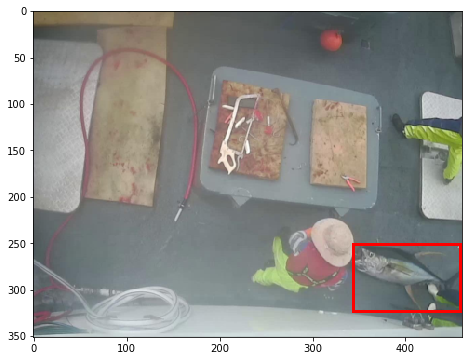

In [269]:
plotXY(xx,yy)

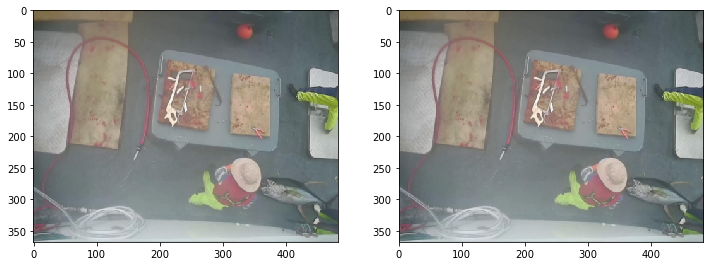

In [270]:
xx, yy = RandomScaleXY(sz=350, max_zoom=1.1, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## RandomCrop

In [271]:
xx, yy = RandomCropXY(targ=350, tfm_y=TfmType.COORD)(x, y)

loss my fish


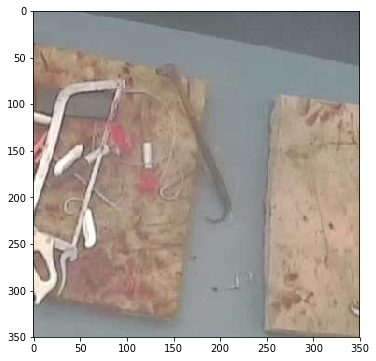

In [272]:
plotXY(xx,yy)

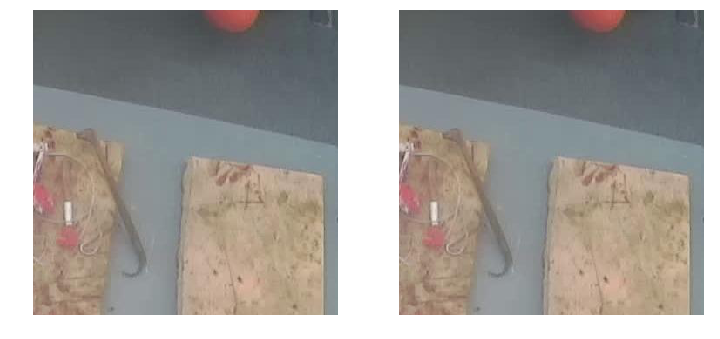

In [64]:
xx, yy = RandomCropXY(350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## No Cropping

In [273]:
xx, yy = NoCropXY(350, tfm_y=TfmType.COORD)(x, y)

[250 260 322 349]


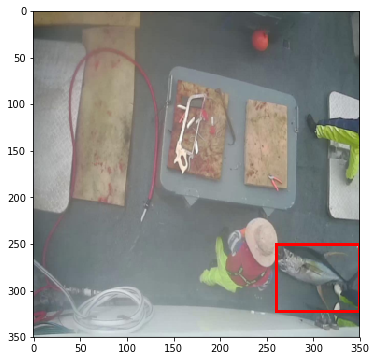

In [274]:
print(yy)
plotXY(xx,yy)

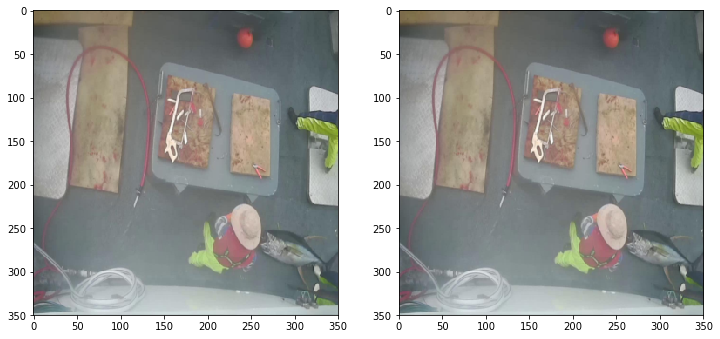

In [275]:
xx, yy = NoCropXY(350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## CenterCrop

In [70]:
xx, yy = CenterCropXY(350, tfm_y=TfmType.COORD)(x, y)

loss my fish


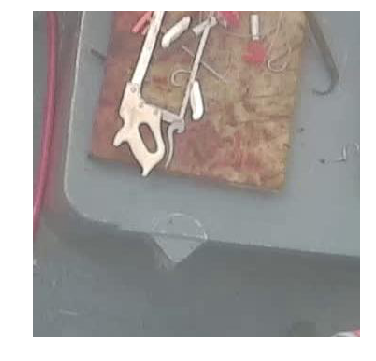

In [71]:
plotXY(xx,yy)

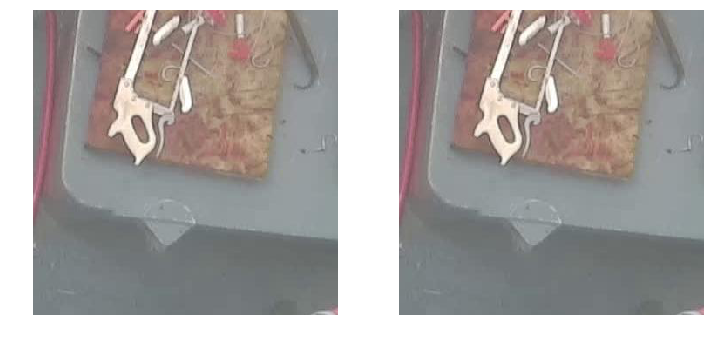

In [72]:
xx, yy = CenterCropXY(350, tfm_y=TfmType.PIXEL)(x, x)
plots([xx, yy])

## Random Dihedral

In [282]:
xx, yy = RandomDihedralXY(TfmType.COORD)(x, y)

In [283]:
print(yy)

[  78  955  274 1275]


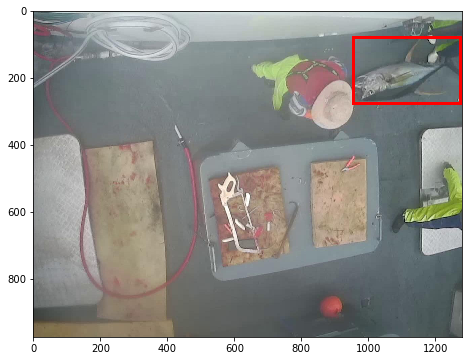

In [284]:
plotXY(xx,yy)

In [285]:
xx, yy = RandomDihedralXY(tfm_y=TfmType.PIXEL)(x, x)

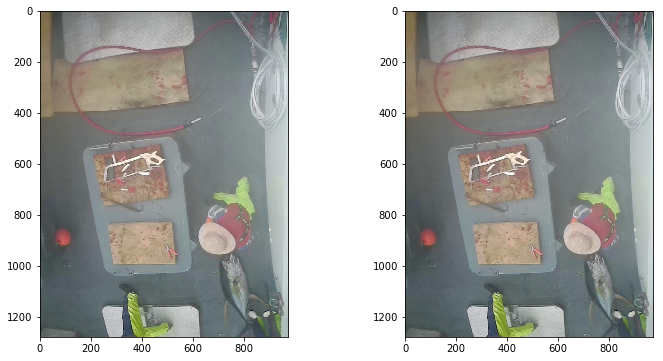

In [286]:
plots([xx,yy])

## RandomFlipXY

[ 699  955  895 1275]


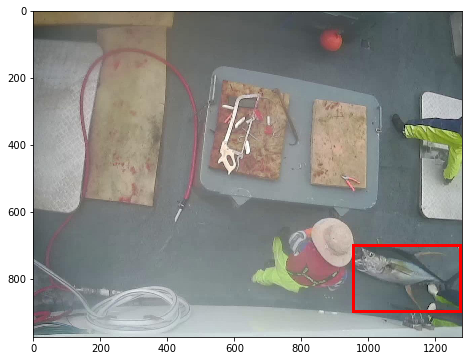

In [289]:
xx, yy = RandomFlipXY(TfmType.COORD)(x, y)
print(yy)
plotXY(xx,yy)

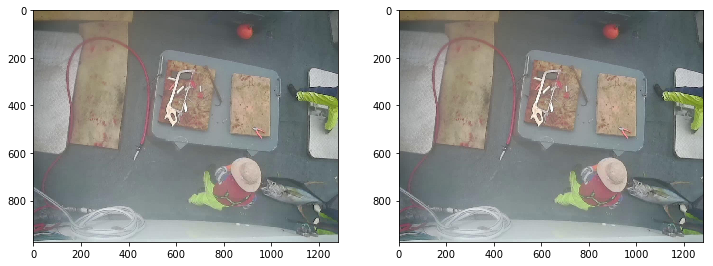

In [290]:
xx, yy = RandomFlipXY(TfmType.PIXEL)(x, x)
plots([xx,yy])

## RandomLightingXY (talk to Jeremy about this)

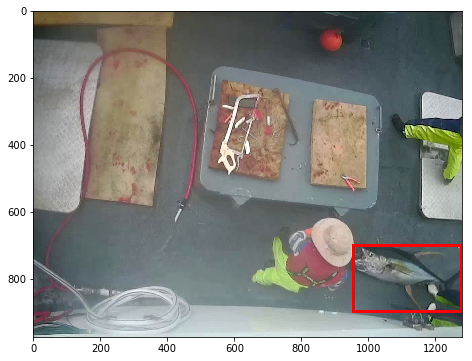

In [291]:
xx, yy = RandomLightingXY(0.5, 0.5)(x, y)
plotXY(xx,yy)

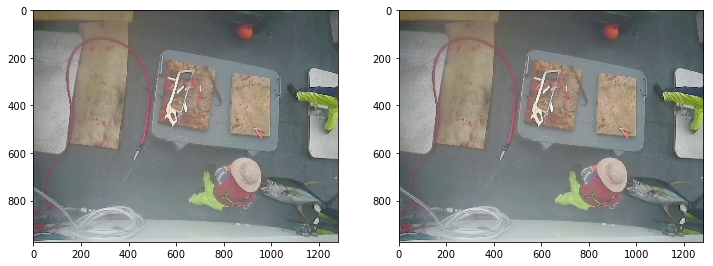

In [292]:
# talk to Jeremy about this
xx, yy = RandomLightingXY(0.5, 0.5, TfmType.PIXEL)(x, x)
plots([xx,yy])

## RandomRotate

In [ ]:
xx, yy = RandomRotateXY(deg=30, p=1, tfm_y=TfmType.COORD)(x, y)
plotXY(xx,yy)

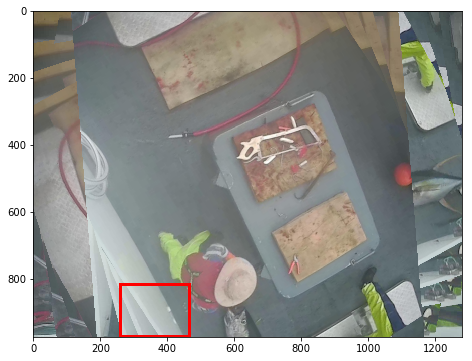

In [297]:
xx, yy = RandomRotateXY(130,p=1.0, tfm_y=TfmType.COORD)(x, y)
plotXY(xx,yy)

In [185]:
y

array([  699.399,   954.697,   895.326,  1275.3  ], dtype=float32)

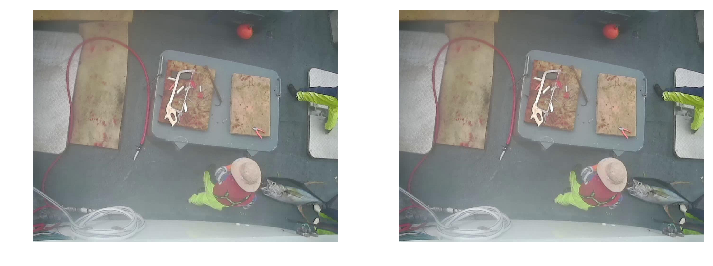

In [154]:
xx, yy = RandomRotateXY(0.5, 0.5, TfmType.PIXEL)(x, x)
plots([xx,yy])